## Library and Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
forest_fire_data_df = pd.read_csv("forestfires.csv")
print("First 3 entries of Data frame are")
forest_fire_data_df.head(3)

First 3 entries of Data frame are


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [24]:
print(f"The (Data Points, Features) in data frame are following {forest_fire_data_df.shape}")

The (Data Points, Features) in data frame are following (517, 31)


## Data Exploration

In [5]:
print(f"The Features in Data are following :- \n {forest_fire_data_df.columns.to_list()}")

The Features in Data are following :- 
 ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep', 'size_category']


In [6]:
forest_fire_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [9]:
print(f"Feature wise null values in the data frame are \n{forest_fire_data_df.isnull().sum()}")

Feature wise null values in the data frame are 
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


In [11]:
forest_fire_data_df[forest_fire_data_df.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


## Conclusion of Data Exploration :-
#### No null values for any features are present in the DataFrame
1. There are 8 duplicate entries present in the DataFrame we shall deal with them in datapreprocessing


## EDA

In [12]:
categorical_features = [feature for feature in forest_fire_data_df.columns if forest_fire_data_df[feature].dtype == 'object']
print(f"Number of Categorical Features in the DataFrame are {len(categorical_features)}")

Number of Categorical Features in the DataFrame are 3


In [19]:
disc_num_feature = [feature for feature in forest_fire_data_df.columns if                                                   ## discreate numerical features
                    ((forest_fire_data_df[feature].dtype != 'object') and (len(forest_fire_data_df[feature].unique()) <= 5))]

con_num_feature = [feature for feature in forest_fire_data_df.columns if                                                    ## Continus numerical features
                    ((forest_fire_data_df[feature].dtype != 'object') and (len(forest_fire_data_df[feature].unique()) > 5))]

print(f"Number of Discrete Numerical Features in the DataFrame are {len(disc_num_feature)}")
print(f"Number of Continus Numerical Features in the DataFrame are {len(con_num_feature)}")

Number of Discrete Numerical Features in the DataFrame are 19
Number of Continus Numerical Features in the DataFrame are 9


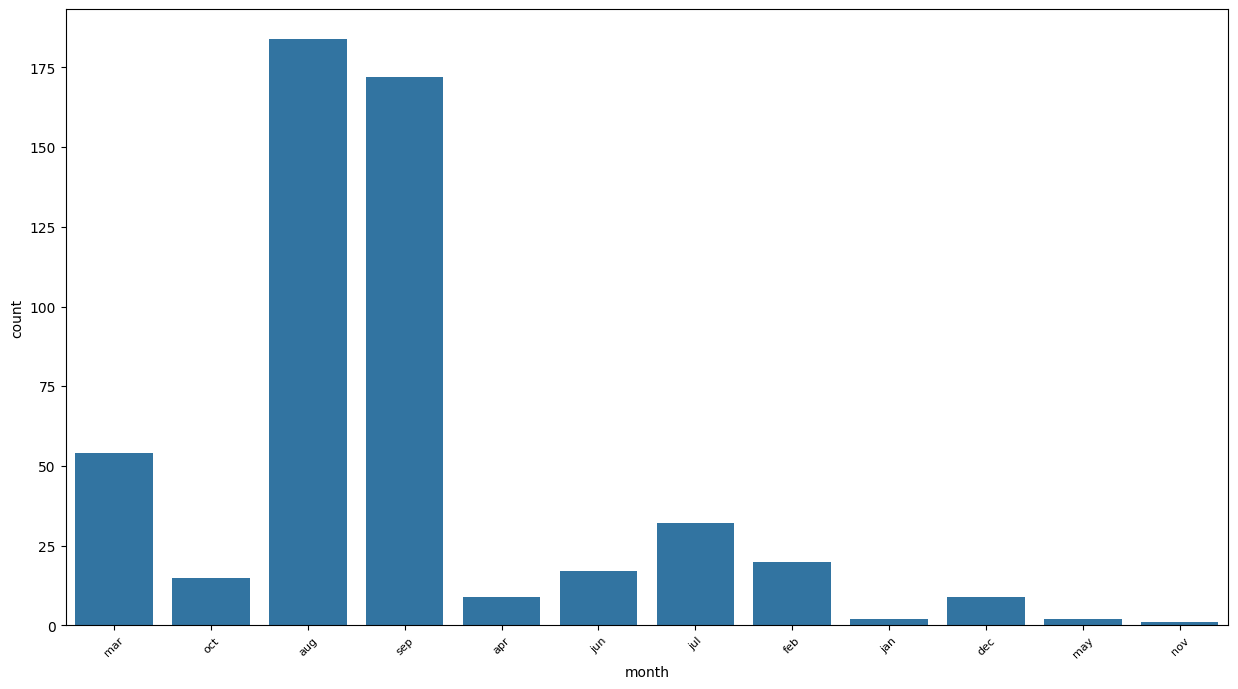

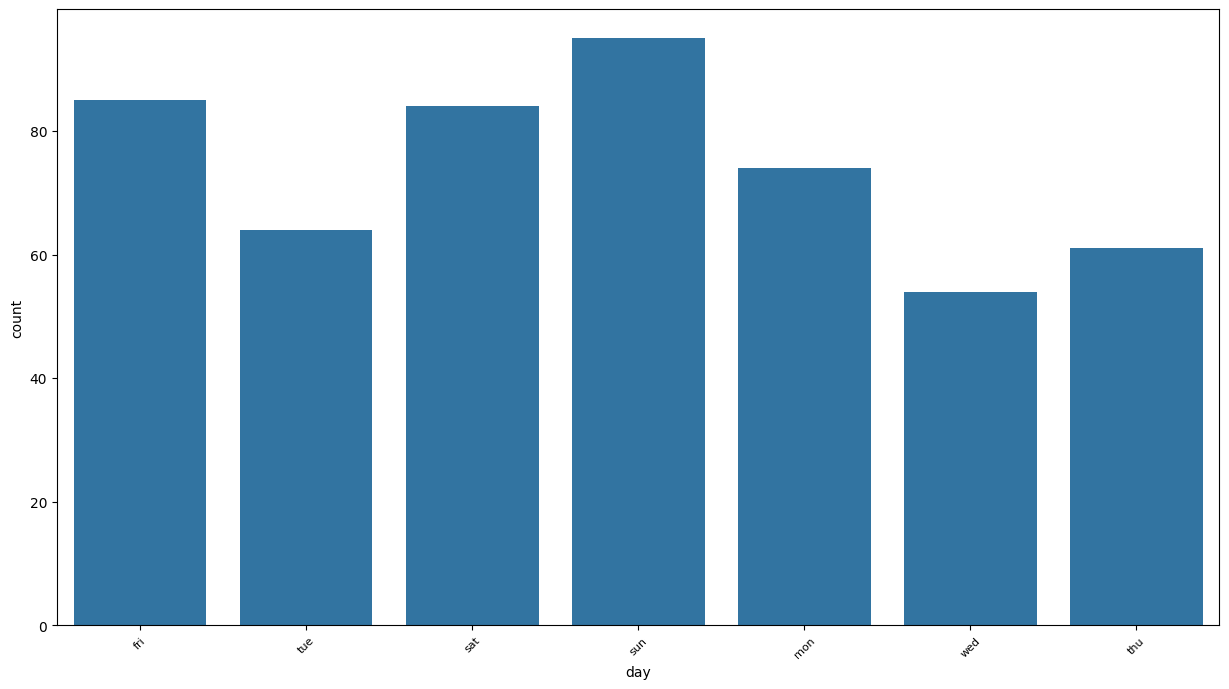

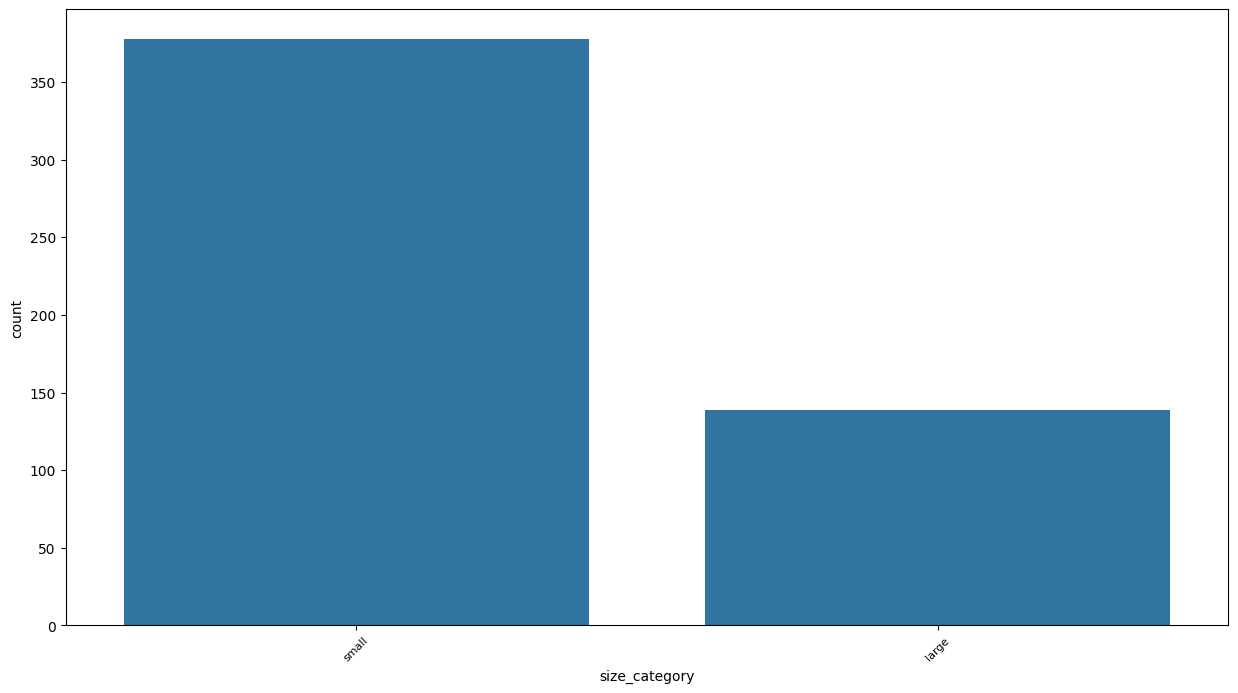

In [20]:
for col in categorical_features:
    plt.figure(figsize=(15,8))
    sns.countplot(x=col,data=forest_fire_data_df)
    plt.xticks(rotation = 45,fontsize=8)
    plt.show()

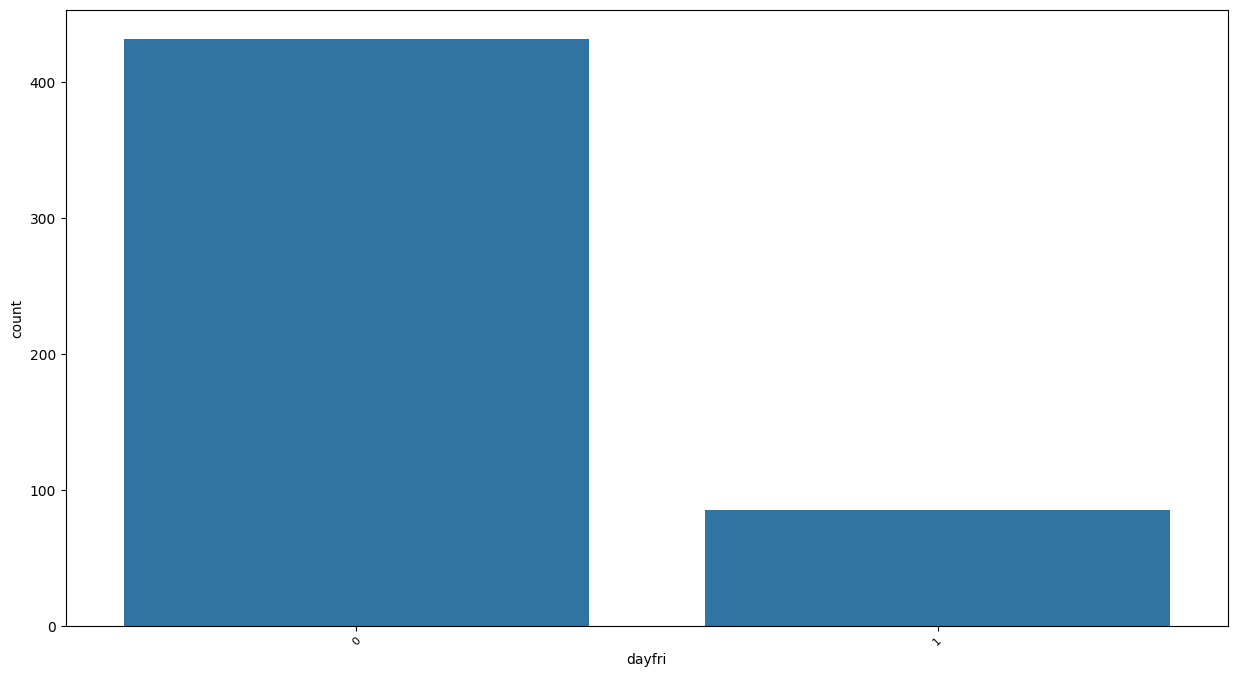

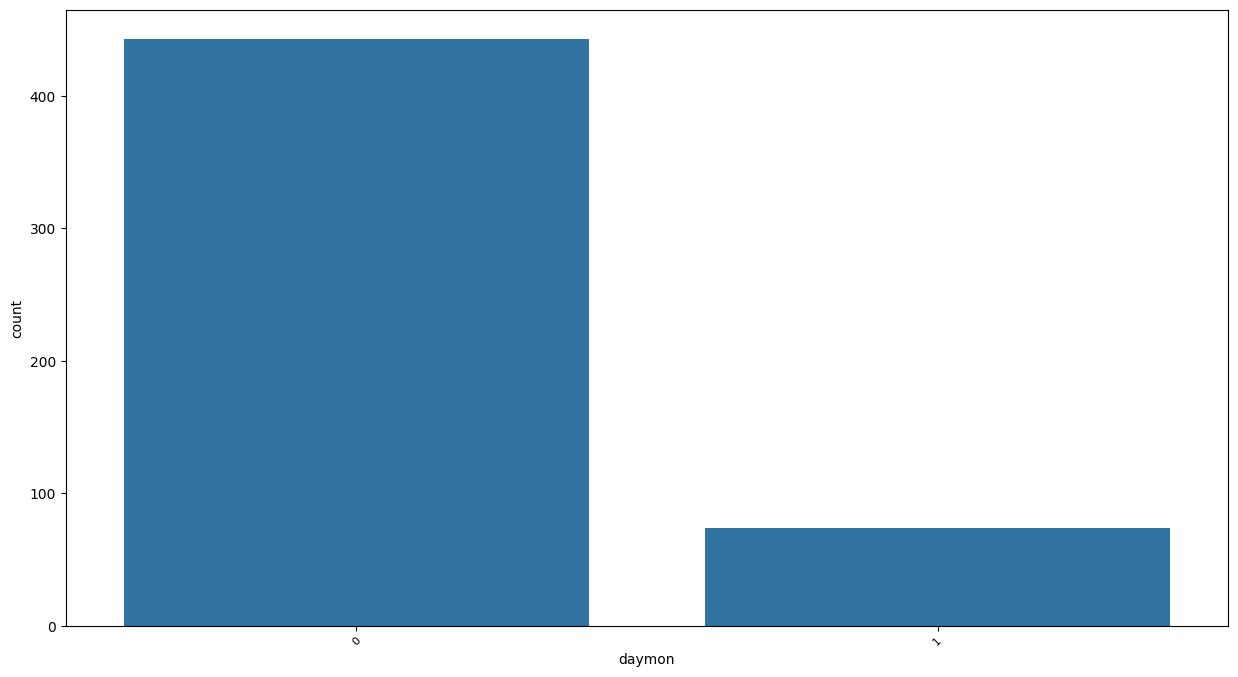

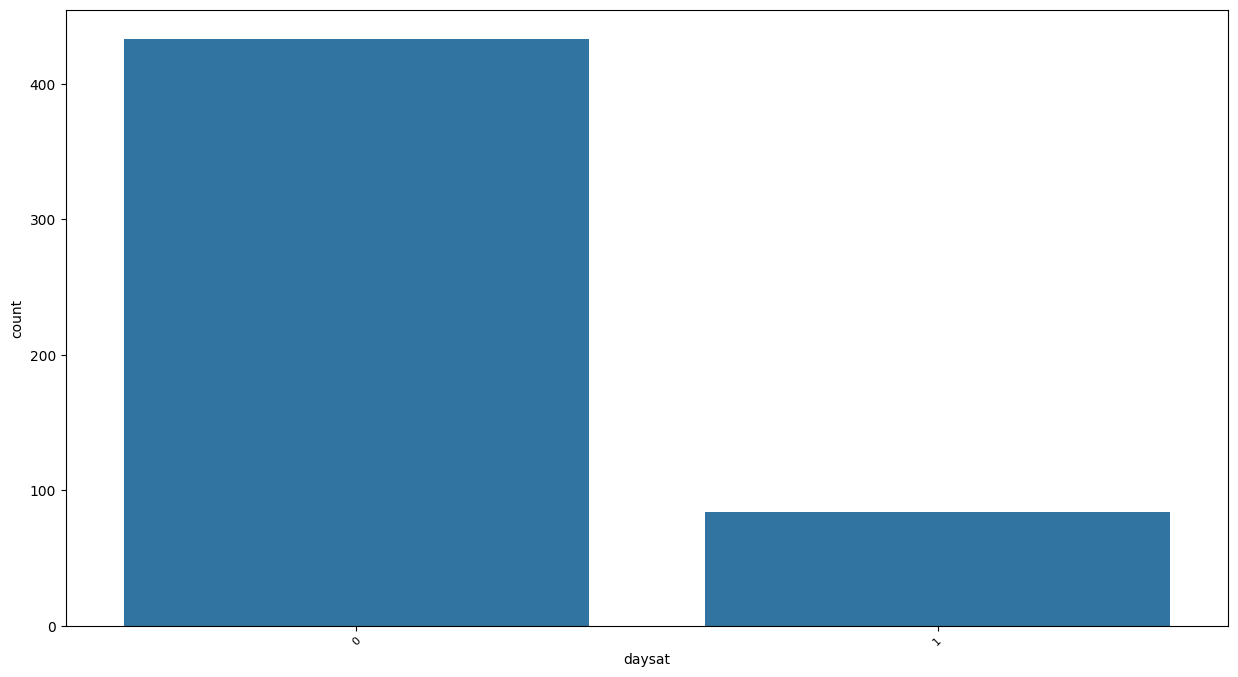

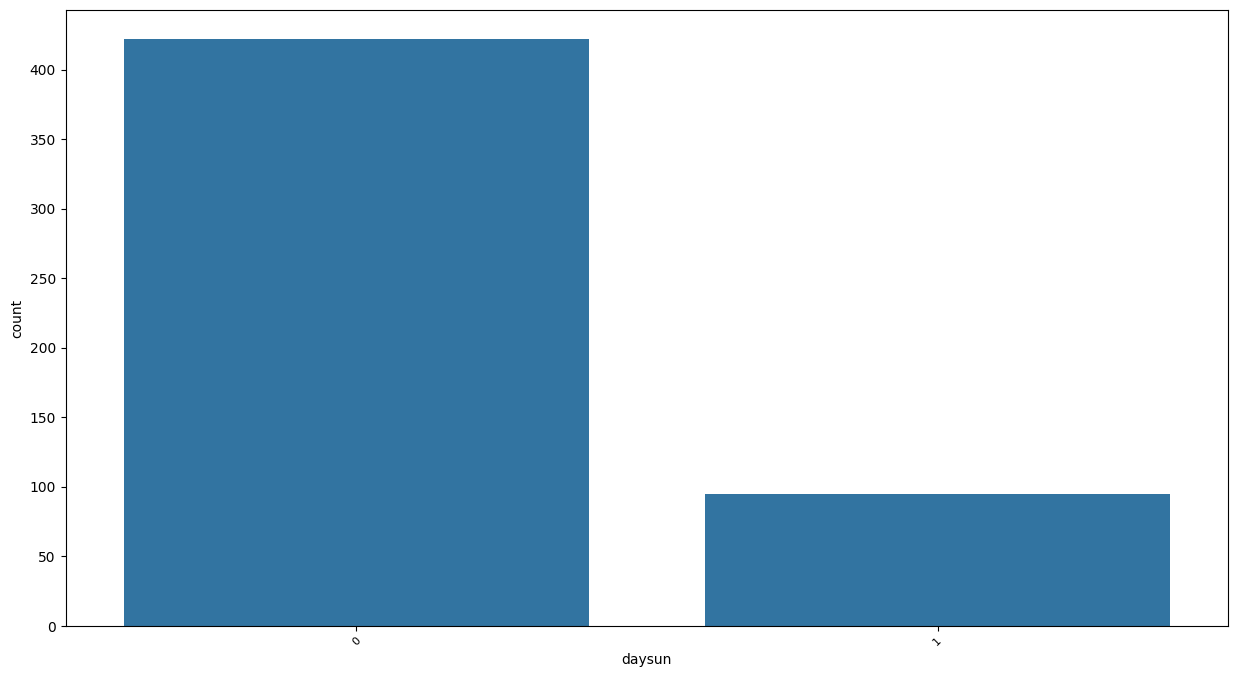

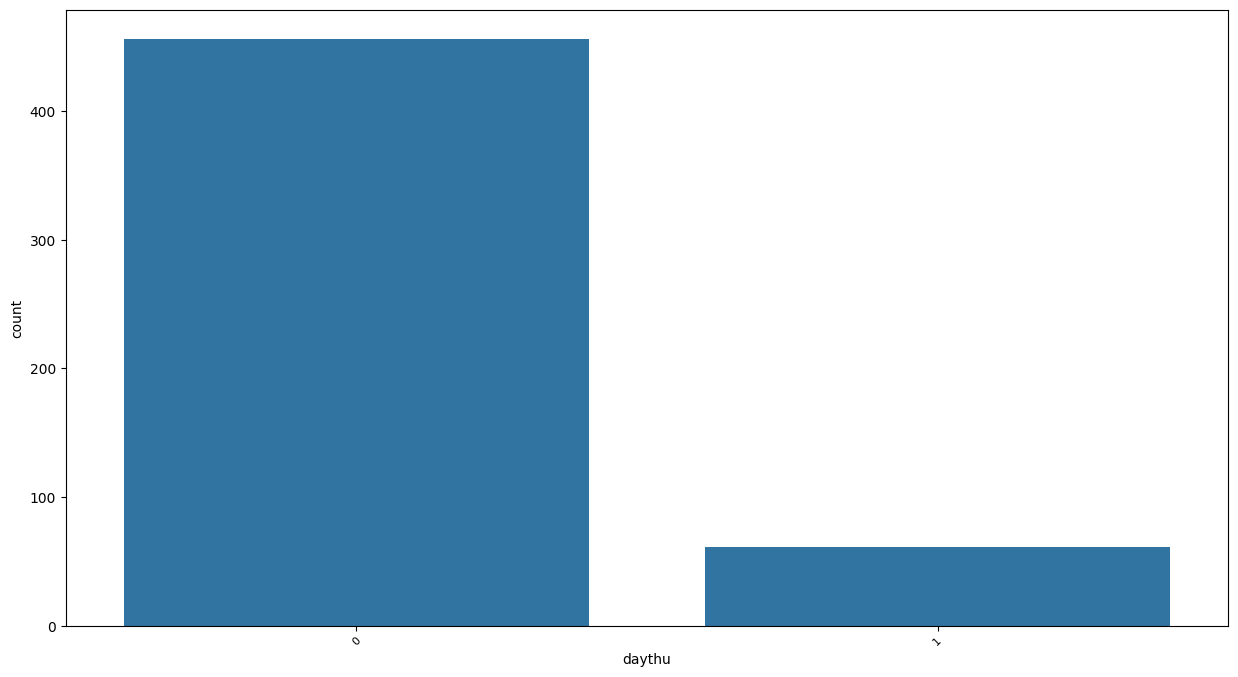

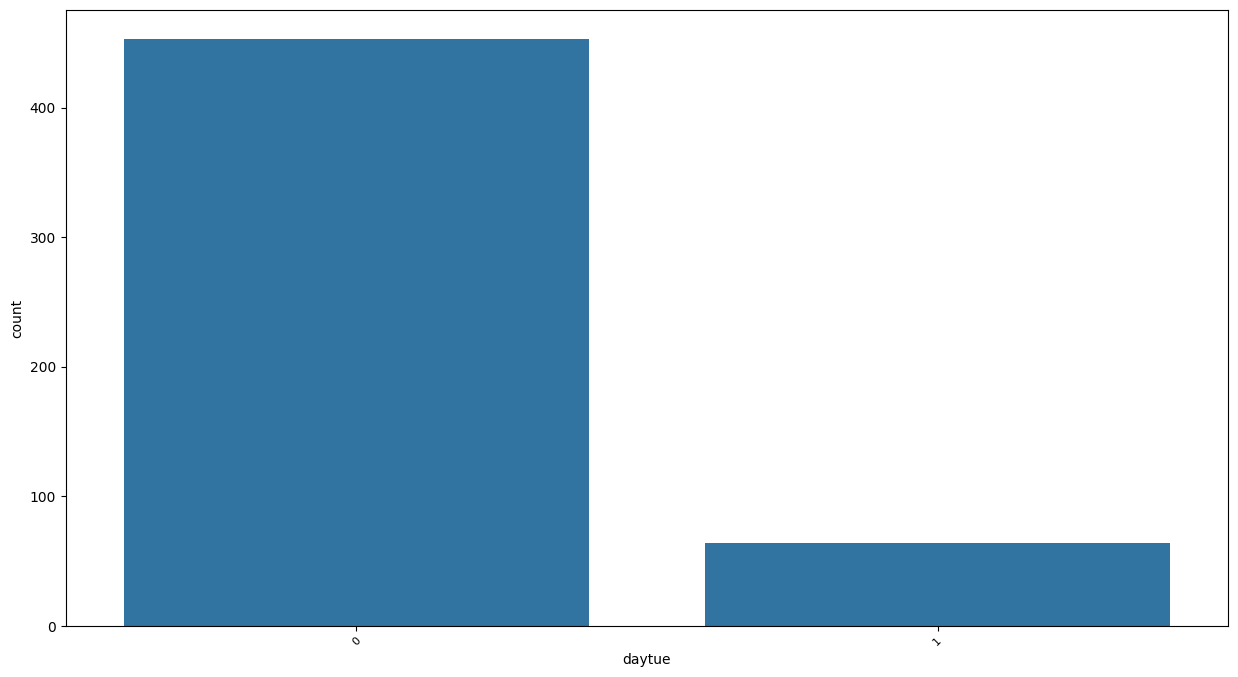

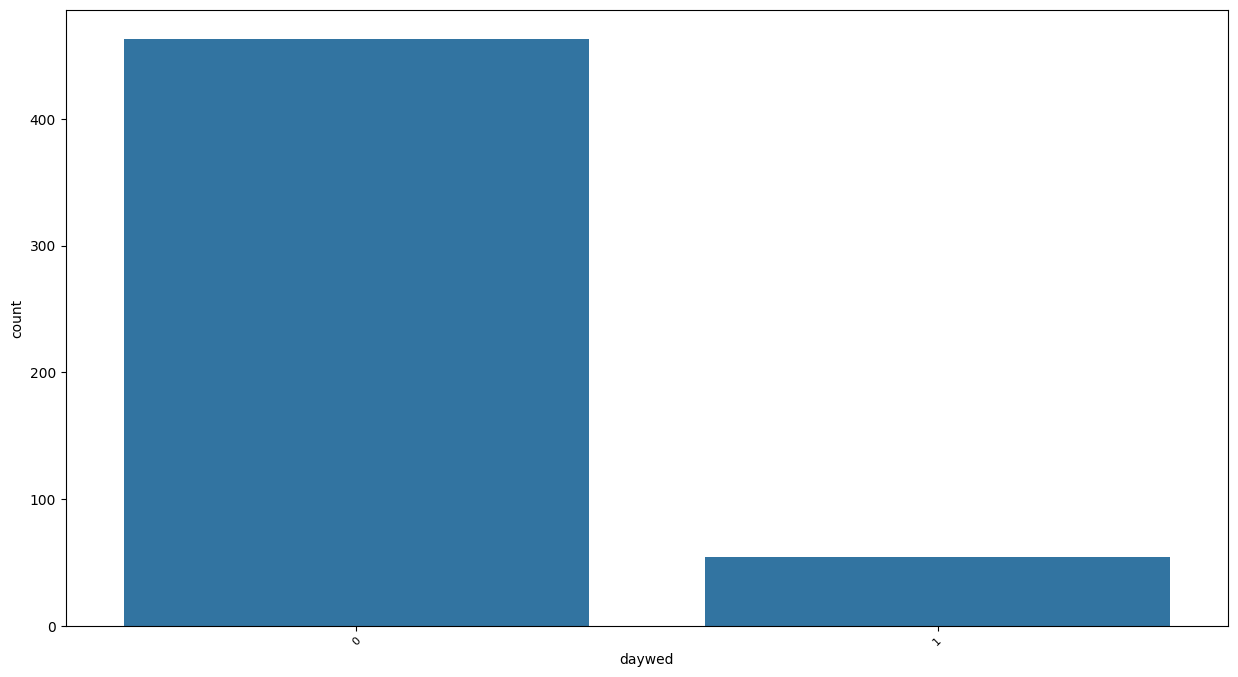

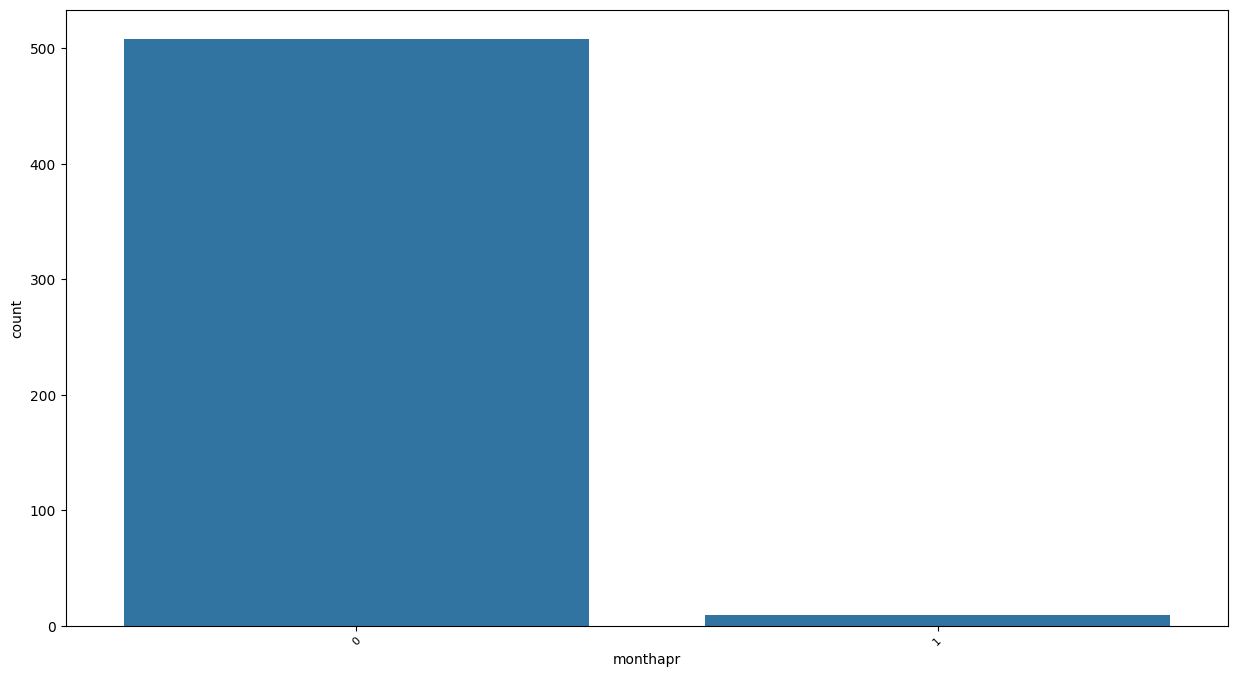

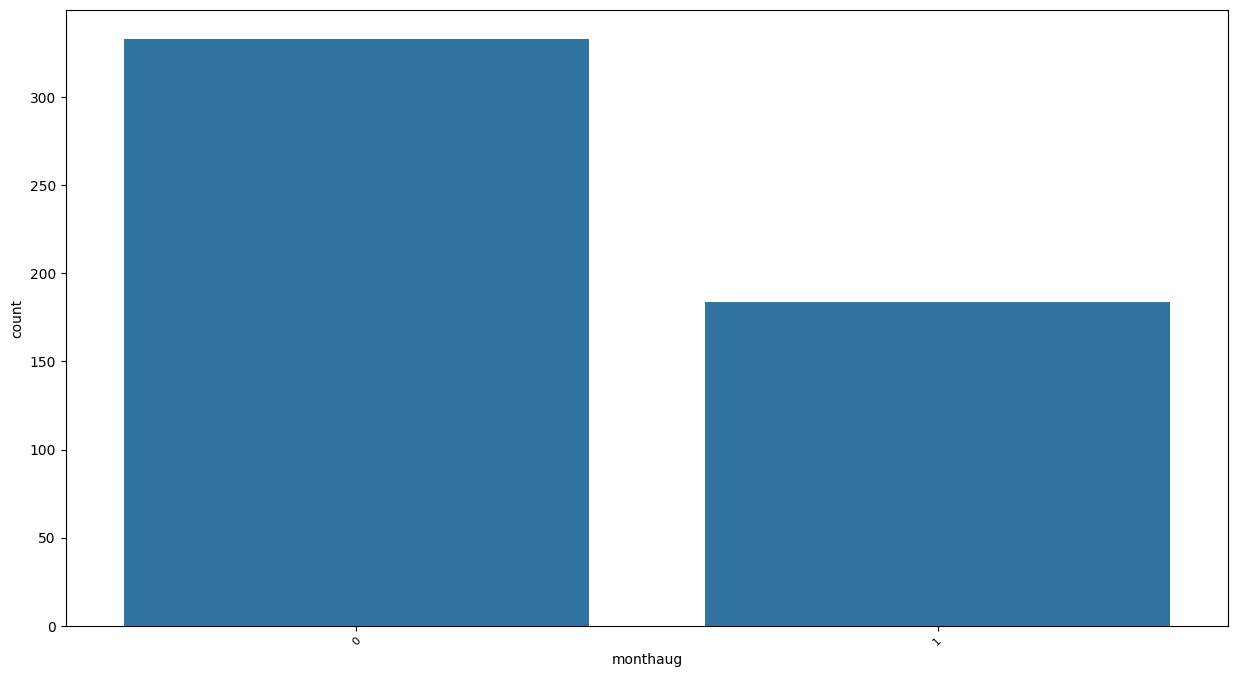

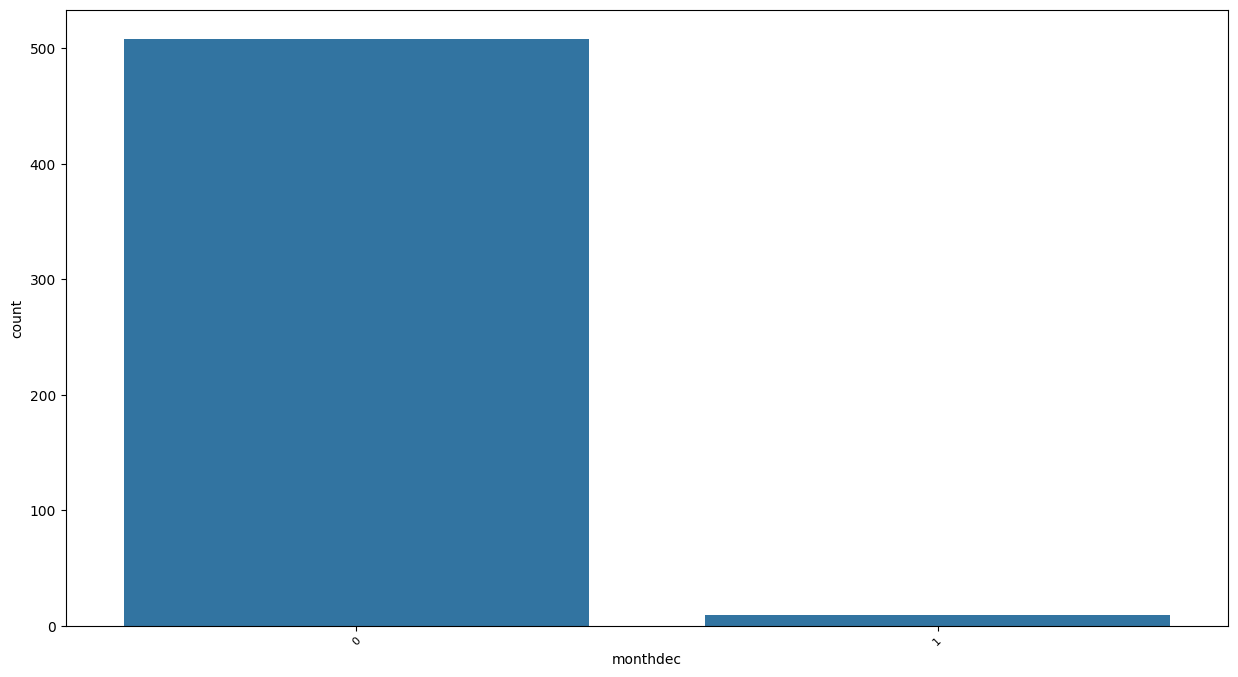

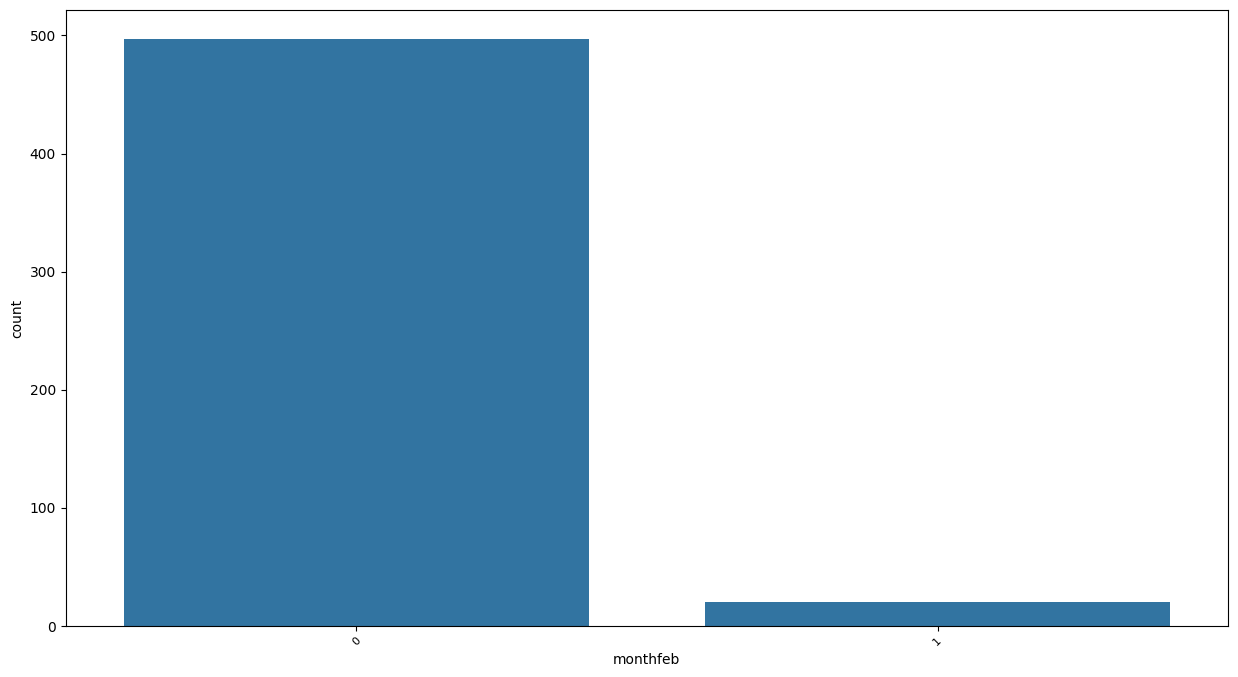

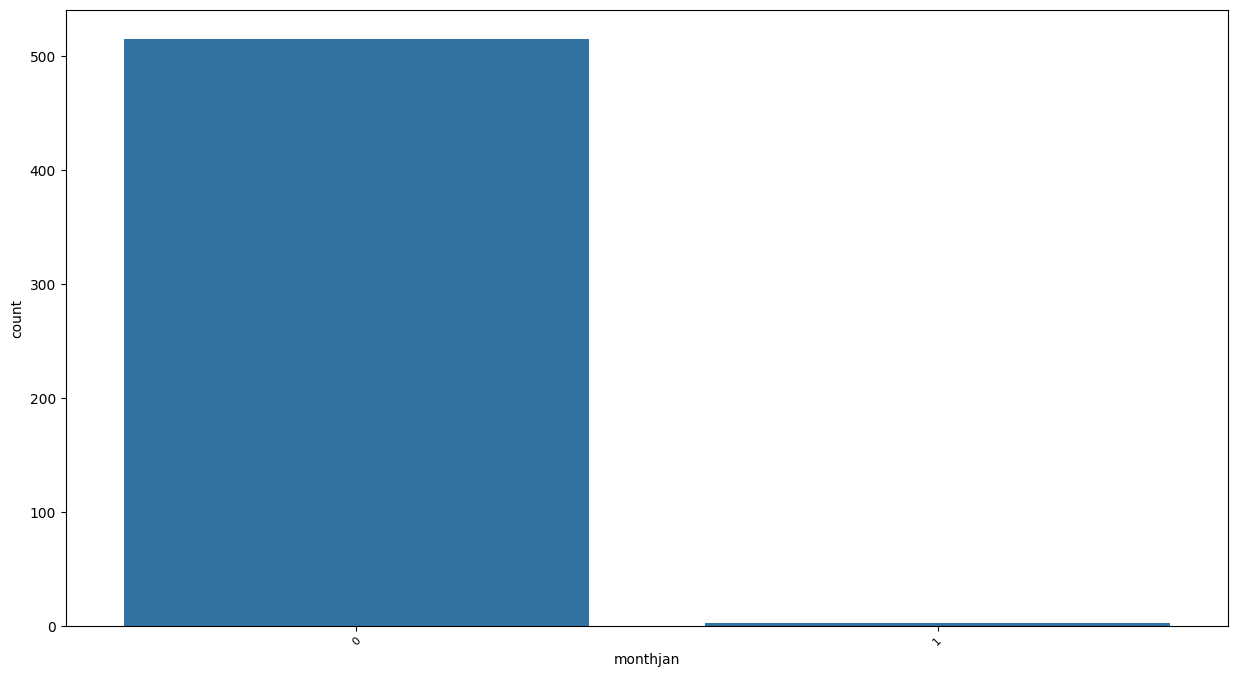

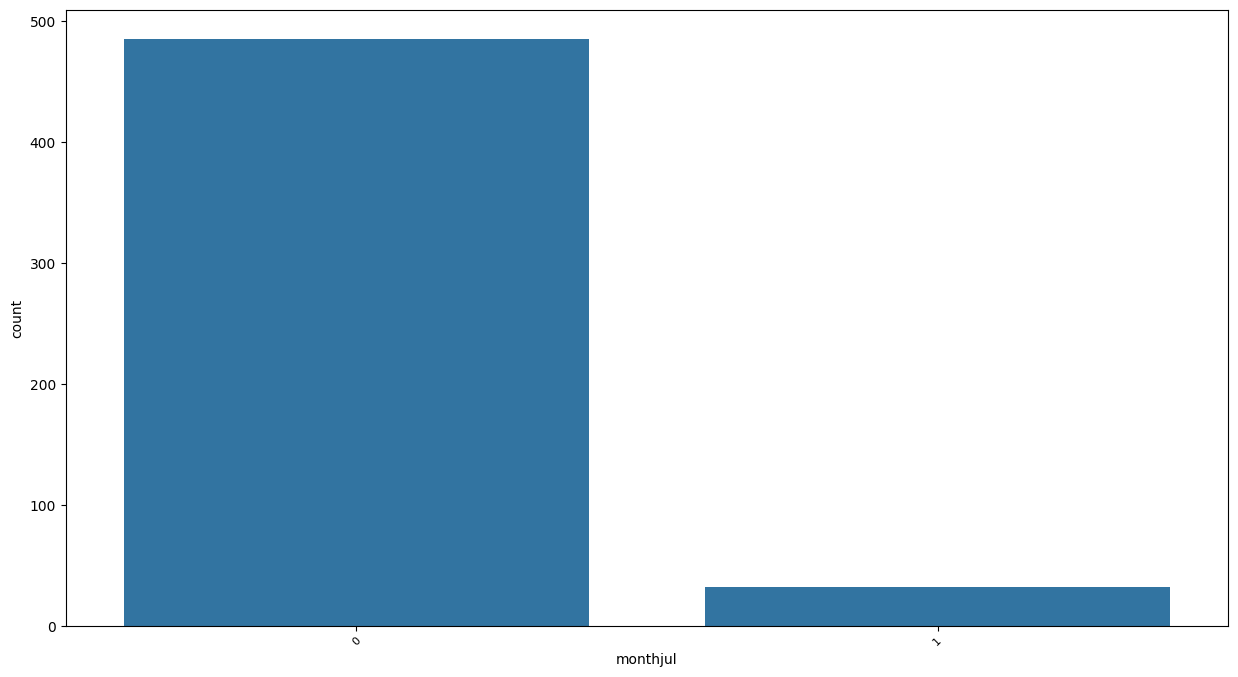

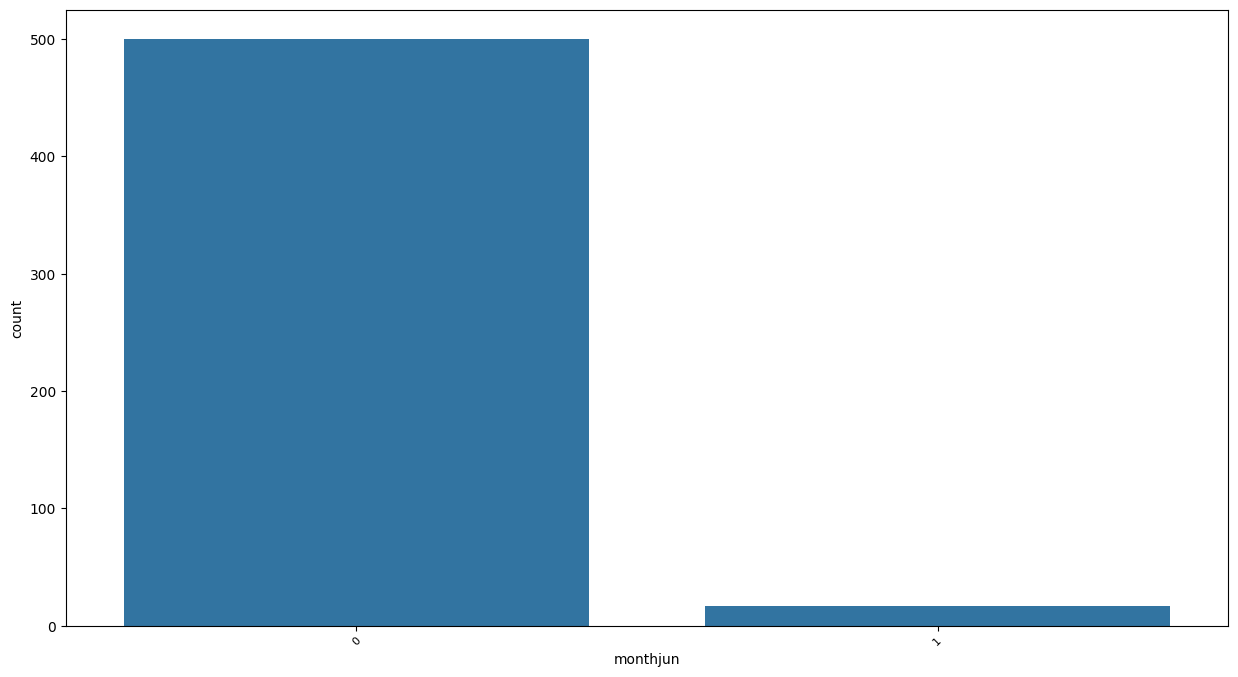

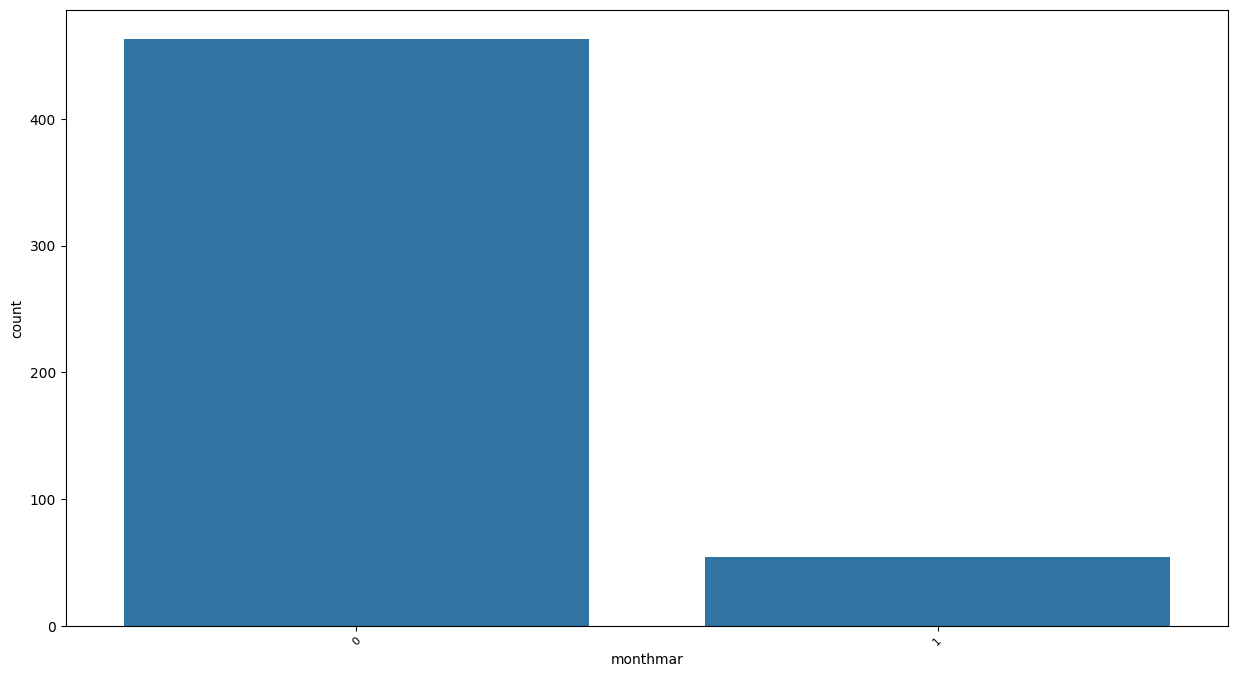

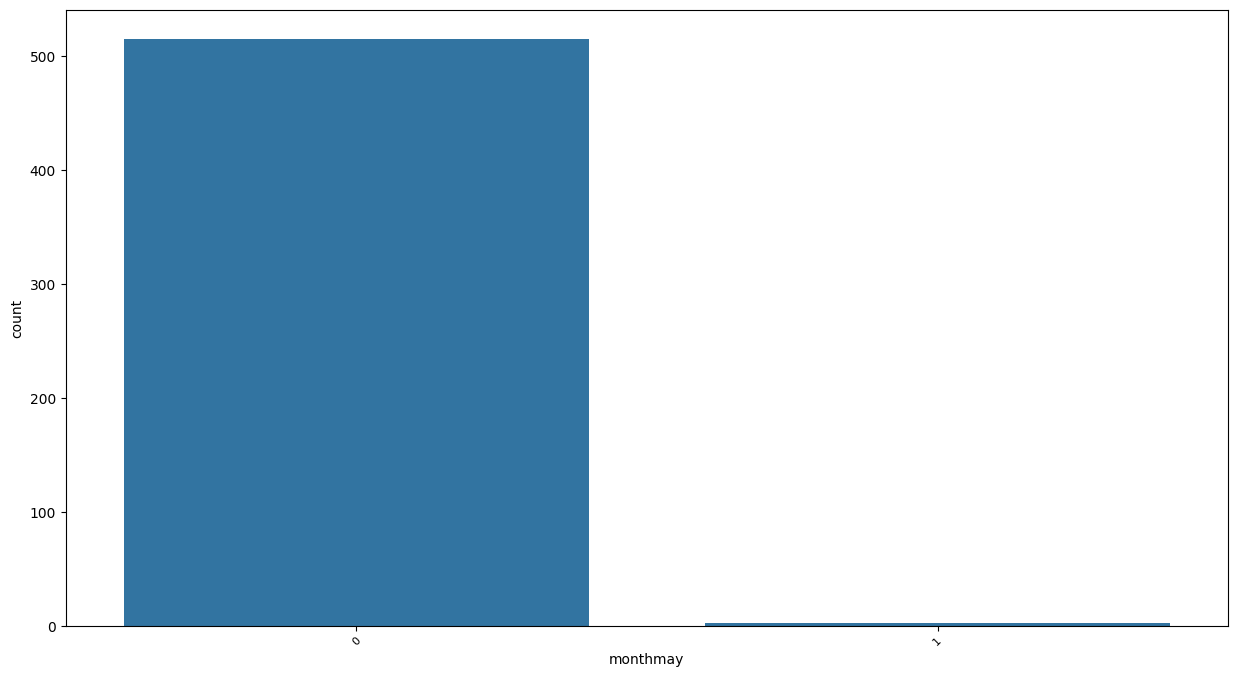

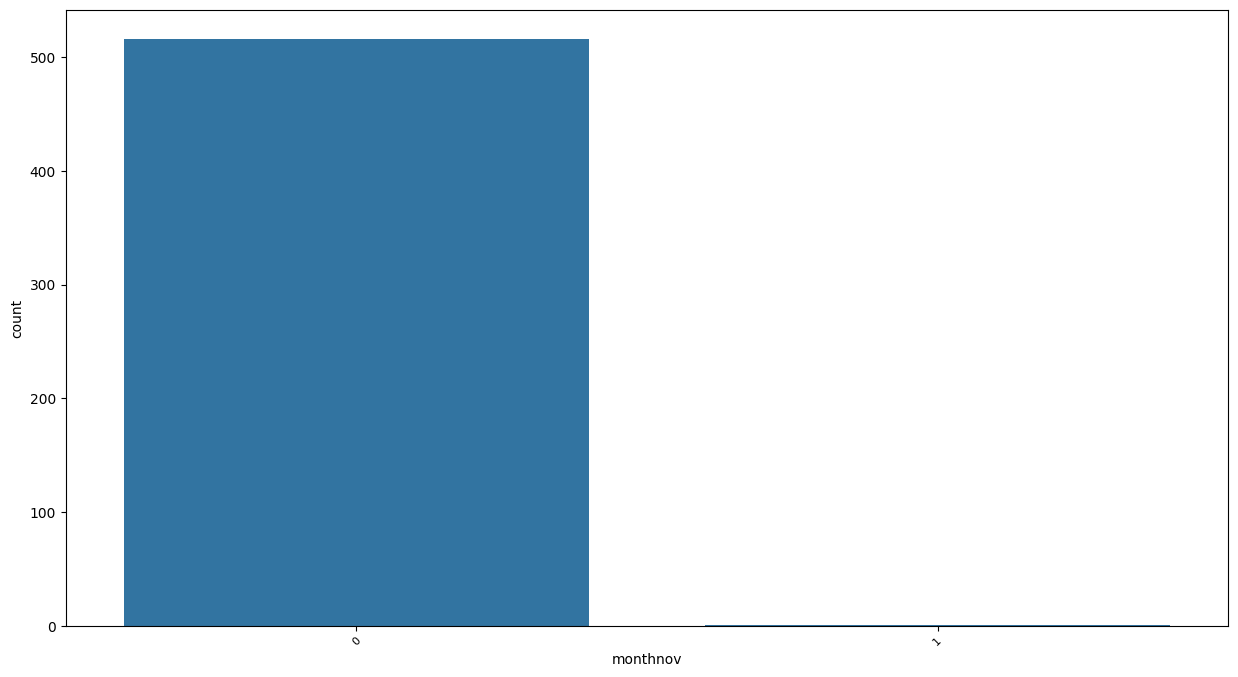

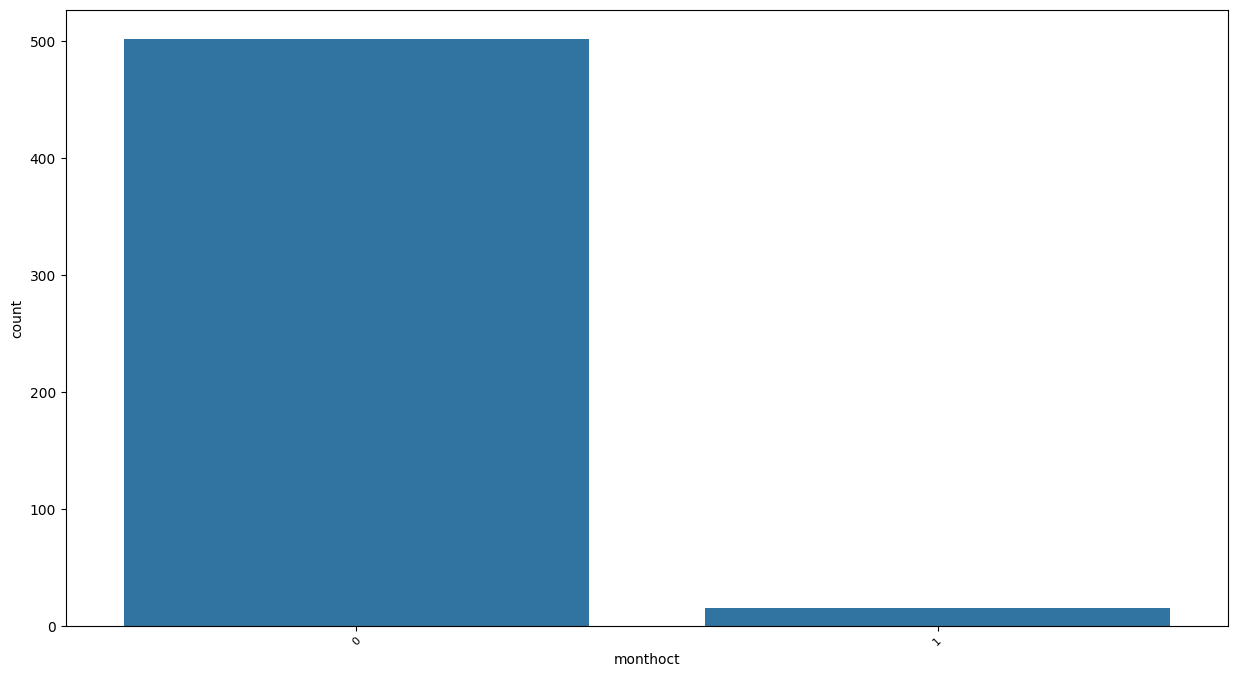

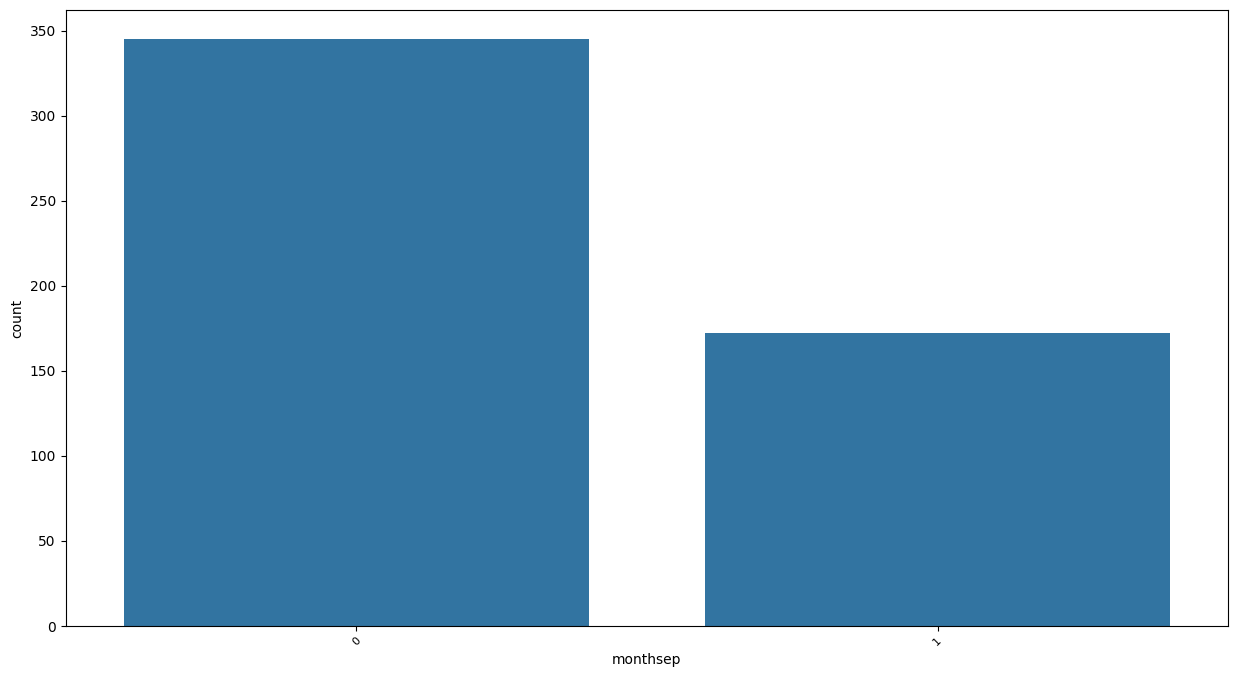

In [21]:
for col in disc_num_feature:
    plt.figure(figsize=(15,8))
    sns.countplot(x=col,data=forest_fire_data_df)
    plt.xticks(rotation = 45,fontsize=8)
    plt.show()

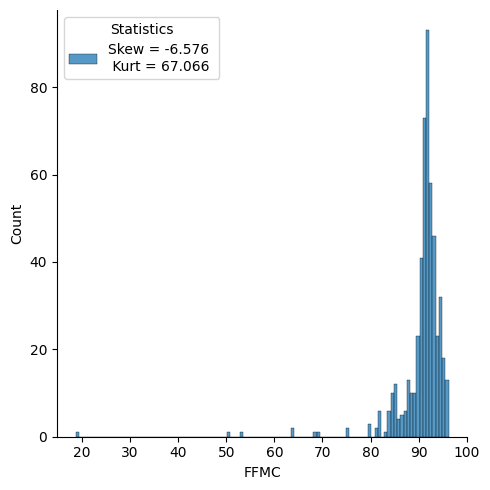

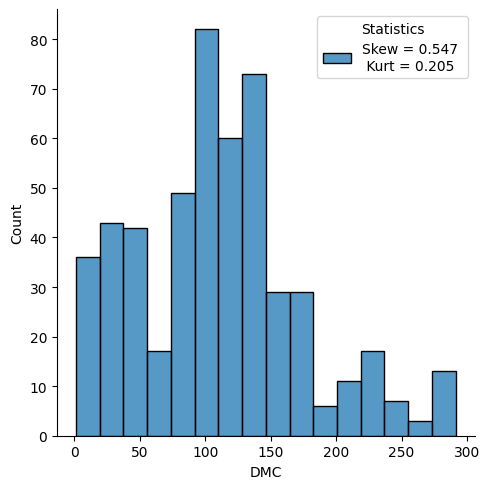

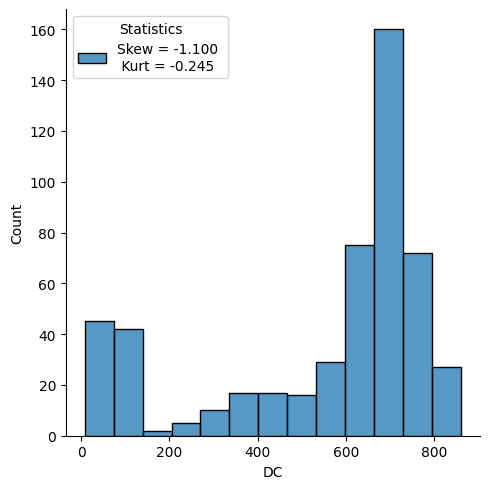

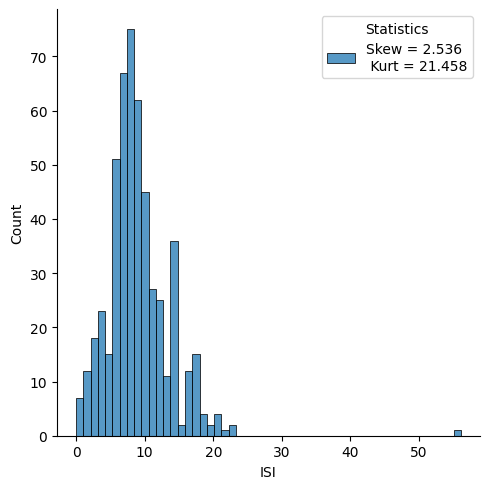

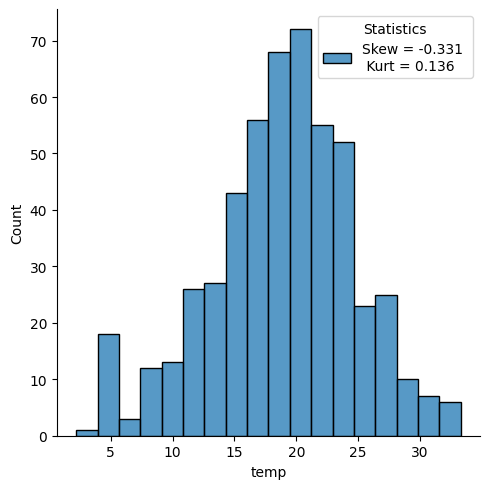

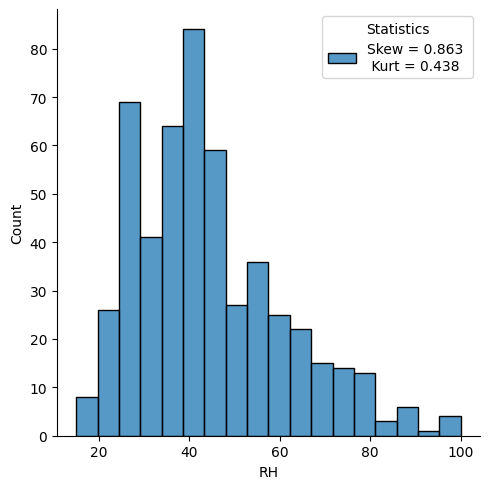

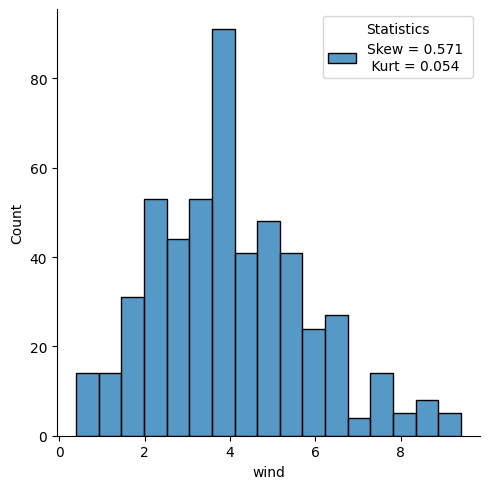

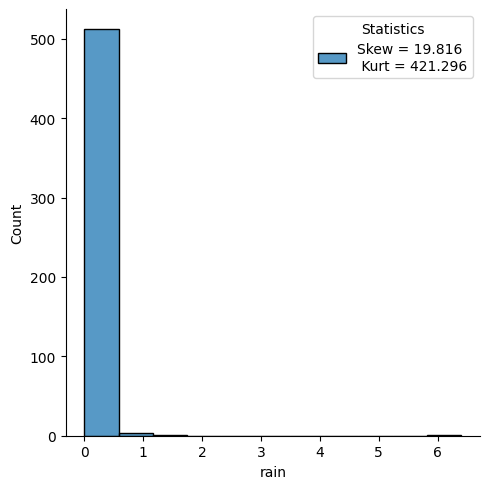

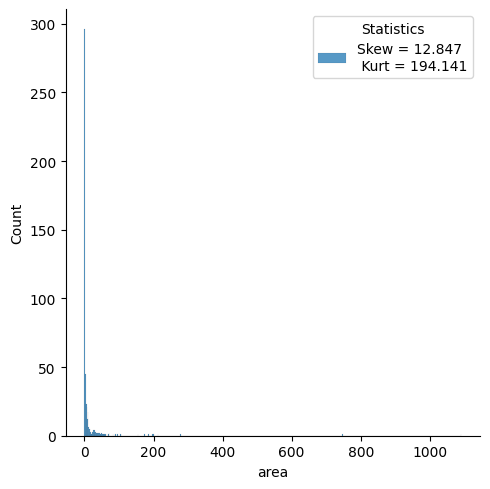

In [22]:
for col in con_num_feature:
  skew = forest_fire_data_df[col].skew()
  kurt = forest_fire_data_df[col].kurt()
  sns.displot(forest_fire_data_df[col],kde=False,label='Skew = %.3f \n Kurt = %.3f' %(skew,kurt))
  plt.legend(title='Statistics')
  plt.show()

## Conclusions from EDA :
1. By observing the number of entries and count plot for the categorical and disrcete numerical features it can be 'daythu','daytue' etc. are dummy columns for the categorical column 'day' and discreate numerical features like 'monthapr', 'monthaug' etc. are dummy columns for the categorical column 'month'

#### 2. Hence we can drop columns like 'month' and 'day' while datapreprocessing

2. The Continus numerical features have a very high value of kewness and kurtosis in general

#### 3. We can handle it by using Standard Scaler

## DataPreprocessing

1. Drop Duplicates

In [26]:
model_df = forest_fire_data_df.drop(['month','day'],axis=1)

In [27]:
model_df.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


In [30]:
model_df.reindex()
model_df.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small


2. Data Scaling and  Label encoding(for target feature)

In [31]:
lE = LabelEncoder()
model_df['size_category']=pd.Series(lE.fit_transform(model_df['size_category']))
model_df.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [34]:
model_df['size_category'].unique()

array([1, 0])

In [35]:
scaler = StandardScaler()

In [37]:
scaler.fit(model_df[con_num_feature])
scaled_data = model_df.copy()
scaled_data[con_num_feature] = scaler.transform(model_df[con_num_feature])
scaled_data.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1


In [40]:
y = scaled_data['size_category']
x = scaled_data.drop('size_category',axis=1)

In [41]:
x.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
y.head(3)

0    1
1    1
2    1
Name: size_category, dtype: int64

3. Training and Testing Data Sepration:

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [44]:
x_train.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
329,0.282028,-0.133975,0.821382,-0.136477,0.794833,-1.060516,-0.009834,-0.073268,-0.149657,0,...,0,0,0,0,0,0,0,0,0,1
173,0.046297,0.244241,0.559101,-0.443828,-0.204993,-0.324396,-1.015466,-0.073268,-0.153745,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
x_test.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
304,-1.005424,-1.295194,-1.751793,-1.212203,-1.308250,3.049489,0.492982,-0.073268,-0.20202,0,...,0,0,0,0,0,0,1,0,0,0
501,0.989220,1.097573,0.497365,1.158784,0.467304,1.270532,0.492982,2.632426,-0.20202,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train.head(2)

329    1
173    1
Name: size_category, dtype: int64

In [47]:
y_test.head(2)

304    1
501    1
Name: size_category, dtype: int64

In [48]:
print(x_test.shape,y_test.shape)

(104, 28) (104,)


In [49]:
print(x_train.shape,y_train.shape)

(413, 28) (413,)


## Model Training and Hyper Parameter tuning

In [50]:
# The parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient (only for 'poly' and 'rbf' kernels)
}

In [51]:
from sklearn.model_selection import GridSearchCV
# Create and SVC classifier
svm = SVC()
# Grid SeArch with cross-validation
gridsearch = GridSearchCV(svm,param_grid,cv=5,scoring='accuracy', n_jobs=-1)

In [52]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [53]:
print("Best Parameters:", gridsearch.best_params_)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


In [54]:
best_svm = gridsearch.best_estimator_

In [55]:
test_accuracy = best_svm.score(x_test,y_test)
print(f"Test Accuracy is {round(test_accuracy*100,2)}%")

Test Accuracy is 97.12%


In [56]:
y_pred = best_svm.predict(x_test)
test_confusion = confusion_matrix(y_test,y_pred)

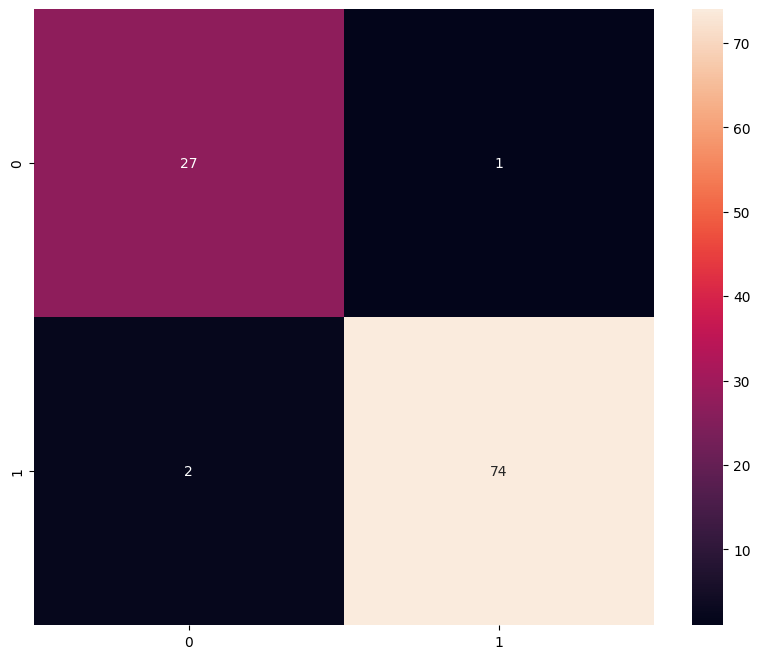

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(test_confusion,annot=True)
plt.show()

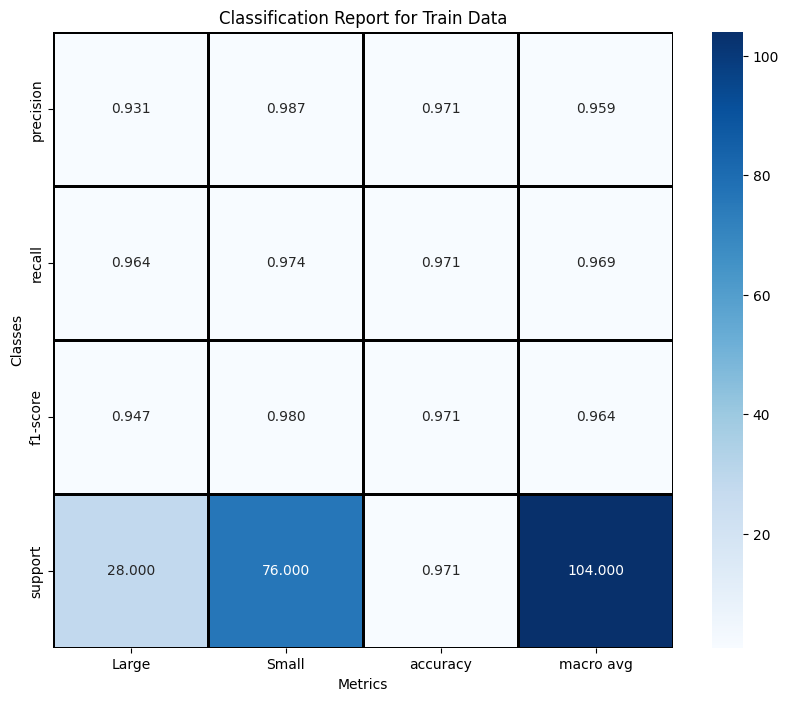

In [59]:
report = classification_report(y_test,y_pred, target_names=['Large','Small'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 8))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report for Train Data')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()